In [ ]:
#import numpy as np
# from sklearn.datasets import load_wine
#import matplotlib.pyplot as plt
#%matplotlib inline
#import seaborn as sns

#from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
# читаем таблицу из файла
sent_lf_list_df = pd.read_csv("lf_corpus_lemmas.csv", encoding="utf-8", sep=",") # есть другие аргументы: sep, decimal и др.

In [3]:
sent_lf_list_df

,Unnamed: 0,phrase,lf-label
0,0,В КРЕМЛЬ И В БЕЛЫЙ ДОМ НА ПРОШЛЫЙ НЕДЕЛЯ ОБОС...,LF
1,1,ЭКОНОМИЧЕСКИЙ СОВЕТНИК ПРЕЗИДЕНТ ПУТИН АКАДЕМ...,LF
2,2,ГЛАЗЬЕВ В ЧАСТНОСТИ КРИТИКОВАТЬ ДЕНЕЖНЫЙ КРЕД...,notLF
3,3,ИМЕННО ЭТОТ МЕХАНИЗМ ЛИШАТЬ СТРАНА ИНВЕСТИЦИЯ...,notLF
4,4,В 60-СТРАНИЧНЫЙ ДОКЛАД АКАДЕМИК ГЛАЗЬЕВ НЕ ПР...,notLF
...,...,...,...
214253,214253,СЛИШКОМ МНОГО ЗА ПОСЛЕДНИЙ ГОД СТАНОВИТЬСЯ ГО...,notLF
214254,214254,А СКОЛЬКО ЧЕЛОВЕК ЧАС СИДЕТЬ В ОСТАНАВЛИВАТЬС...,LF
214255,214255,ВОЛНА СУДЕБНЫЙ ИСК ПРОСТО СМЫВАТЬ БЫ И ГОСПОД...,notLF
214256,214256,ПОКА ЖЕ У ЭНЕРГОПЫЛЕСОС ЕЖЕГОДНО ВЫКАЧИВАТЬ И...,notLF


In [4]:
sent_lf_list_df["lf-label"]=sent_lf_list_df["lf-label"].map({'LF':1,'notLF':0}) # в первой колонке переименуем значения 'spam' в 1  и 'ham' в 0

sent_lf_list_df

,Unnamed: 0,phrase,lf-label
0,0,В КРЕМЛЬ И В БЕЛЫЙ ДОМ НА ПРОШЛЫЙ НЕДЕЛЯ ОБОС...,1
1,1,ЭКОНОМИЧЕСКИЙ СОВЕТНИК ПРЕЗИДЕНТ ПУТИН АКАДЕМ...,1
2,2,ГЛАЗЬЕВ В ЧАСТНОСТИ КРИТИКОВАТЬ ДЕНЕЖНЫЙ КРЕД...,0
3,3,ИМЕННО ЭТОТ МЕХАНИЗМ ЛИШАТЬ СТРАНА ИНВЕСТИЦИЯ...,0
4,4,В 60-СТРАНИЧНЫЙ ДОКЛАД АКАДЕМИК ГЛАЗЬЕВ НЕ ПР...,0
...,...,...,...
214253,214253,СЛИШКОМ МНОГО ЗА ПОСЛЕДНИЙ ГОД СТАНОВИТЬСЯ ГО...,0
214254,214254,А СКОЛЬКО ЧЕЛОВЕК ЧАС СИДЕТЬ В ОСТАНАВЛИВАТЬС...,1
214255,214255,ВОЛНА СУДЕБНЫЙ ИСК ПРОСТО СМЫВАТЬ БЫ И ГОСПОД...,0
214256,214256,ПОКА ЖЕ У ЭНЕРГОПЫЛЕСОС ЕЖЕГОДНО ВЫКАЧИВАТЬ И...,0


In [5]:
# переименуем колонку, а то получается ошибка из-за дефиса в одной из следующих ячеек
sent_lf_list_df.rename(columns={"lf-label": "label"}, inplace=True)
sent_lf_list_df.head()

,Unnamed: 0,phrase,label
0,0,В КРЕМЛЬ И В БЕЛЫЙ ДОМ НА ПРОШЛЫЙ НЕДЕЛЯ ОБОС...,1
1,1,ЭКОНОМИЧЕСКИЙ СОВЕТНИК ПРЕЗИДЕНТ ПУТИН АКАДЕМ...,1
2,2,ГЛАЗЬЕВ В ЧАСТНОСТИ КРИТИКОВАТЬ ДЕНЕЖНЫЙ КРЕД...,0
3,3,ИМЕННО ЭТОТ МЕХАНИЗМ ЛИШАТЬ СТРАНА ИНВЕСТИЦИЯ...,0
4,4,В 60-СТРАНИЧНЫЙ ДОКЛАД АКАДЕМИК ГЛАЗЬЕВ НЕ ПР...,0


In [6]:
classes = pd.value_counts(sent_lf_list_df["label"])

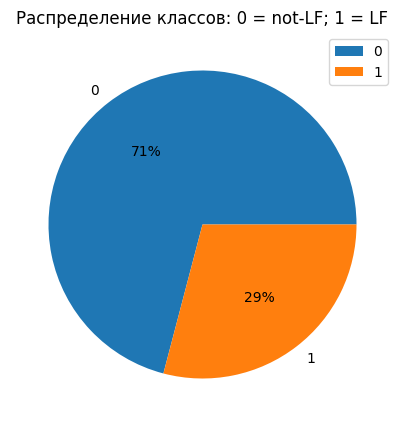

In [7]:
import matplotlib.pyplot as plt
classes.plot(kind='pie',figsize=(5,5),autopct='%0.f%%', legend=True, title ="Распределение классов: 0 = not-LF; 1 = LF")
plt.ylabel('')
plt.show()

In [8]:
sent_lf_list_df.label.value_counts()

0    151940
1     62318
Name: label, dtype: int64

In [9]:
# так сбалансируем классы
#data_balanced = sent_lf_list_df[sent_lf_list_df.label == 1].append(sent_lf_list_df[sent_lf_list_df.label == 0].sample(n=2400))

In [10]:
# проверяем классы
#data_balanced.label.value_counts()

In [11]:
#data_balanced.shape

In [12]:
#type(data_balanced.phrase)

In [13]:
# делаем такой векторизатор, который будет векторизовать тексты, вычеркивая стоп слова - делать tf
from sklearn import feature_extraction
f = feature_extraction.text.CountVectorizer(stop_words = ['и', 'а', 'я', 'как', 'если', 'всегда', 'что', 'не', 'это'])
type(f)

sklearn.feature_extraction.text.CountVectorizer

In [14]:
X = f.fit_transform(sent_lf_list_df["phrase"])

In [15]:
# разделение на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, sent_lf_list_df["label"], test_size=0.15, random_state=25)

In [16]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(stop_words= ['и', 'а', 'я', 'как', 'если', 'всегда', 'что', 'не', 'это'])
#X = vectorizer.fit_transform(data_balanced['phrase'])

In [17]:
# разделение на обучающую и тестовую выборку
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split( X, data_balanced["label"], test_size=0.15, random_state=25)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
tree_clf = DecisionTreeClassifier()

In [20]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
tree_y_pred = tree_clf.predict(X_test)

In [22]:
len(tree_y_pred)

32139

In [23]:
tree_y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     22836
           1       0.94      0.93      0.93      9303

    accuracy                           0.96     32139
   macro avg       0.96      0.95      0.95     32139
weighted avg       0.96      0.96      0.96     32139



In [25]:
classification_report(y_test, tree_y_pred, output_dict = True)

{'0': {'precision': 0.969769464984776,
  'recall': 0.9763093361359257,
  'f1-score': 0.9730284118186183,
  'support': 22836},
 '1': {'precision': 0.9408678544103181,
  'recall': 0.9252929162635709,
  'f1-score': 0.9330153912854975,
  'support': 9303},
 'accuracy': 0.9615420517128722,
 'macro avg': {'precision': 0.955318659697547,
  'recall': 0.9508011261997483,
  'f1-score': 0.9530219015520579,
  'support': 32139},
 'weighted avg': {'precision': 0.9614035642668265,
  'recall': 0.9615420517128722,
  'f1-score': 0.9614461867954495,
  'support': 32139}}

In [26]:
type(classification_report(y_test, tree_y_pred))

str

In [27]:

pd.DataFrame.from_dict(classification_report(y_test, tree_y_pred, output_dict = True))

,0,1,accuracy,macro avg,weighted avg
precision,0.969769,0.940868,0.961542,0.955319,0.961404
recall,0.976309,0.925293,0.961542,0.950801,0.961542
f1-score,0.973028,0.933015,0.961542,0.953022,0.961446
support,22836.000000,9303.000000,0.961542,32139.000000,32139.000000


In [28]:
print(confusion_matrix(y_test, tree_y_pred))

[[22295   541]
 [  695  8608]]


In [29]:
m_confusion_test = confusion_matrix(y_test, tree_y_pred)
pd.DataFrame(data = m_confusion_test, columns = ['Predicted not-LF', 'Predicted LF'],
            index = ['Actual not-LF', 'Actual LF'])

,Predicted not-LF,Predicted LF
Actual not-LF,22295,541
Actual LF,695,8608


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
gb_clf = GradientBoostingClassifier(n_estimators=500, random_state=10, verbose=10)

In [32]:
gb_clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1945           16.31m
         2           1.1849           16.19m
         3           1.1772           16.16m
         4           1.1707           16.17m
         5           1.1652           16.19m
         6           1.1604           16.37m
         7           1.1562           16.35m
         8           1.1524           16.31m
         9           1.1489           16.24m
        10           1.1449           16.17m
        11           1.1418           16.10m
        12           1.1389           16.05m
        13           1.1363           16.02m
        14           1.1337           15.99m
        15           1.1307           15.94m
        16           1.1283           15.89m
        17           1.1262           15.86m
        18           1.1242           15.82m
        19           1.1223           15.78m
        20           1.1201           15.73m
        21           1.1183           15.68m
        2

       183           1.0063           10.62m
       184           1.0059           10.59m
       185           1.0055           10.56m
       186           1.0052           10.53m
       187           1.0048           10.50m
       188           1.0044           10.46m
       189           1.0040           10.43m
       190           1.0037           10.40m
       191           1.0034           10.36m
       192           1.0031           10.33m
       193           1.0027           10.29m
       194           1.0024           10.26m
       195           1.0020           10.22m
       196           1.0017           10.19m
       197           1.0014           10.15m
       198           1.0011           10.12m
       199           1.0008           10.08m
       200           1.0004           10.04m
       201           1.0001           10.01m
       202           0.9998            9.97m
       203           0.9994            9.94m
       204           0.9991            9.90m
       205

       366           0.9577            4.40m
       367           0.9575            4.37m
       368           0.9572            4.33m
       369           0.9570            4.30m
       370           0.9568            4.27m
       371           0.9565            4.24m
       372           0.9563            4.20m
       373           0.9561            4.17m
       374           0.9559            4.14m
       375           0.9556            4.10m
       376           0.9554            4.07m
       377           0.9552            4.04m
       378           0.9550            4.00m
       379           0.9548            3.97m
       380           0.9545            3.94m
       381           0.9544            3.90m
       382           0.9542            3.87m
       383           0.9540            3.84m
       384           0.9538            3.81m
       385           0.9536            3.77m
       386           0.9534            3.74m
       387           0.9532            3.71m
       388

GradientBoostingClassifier(n_estimators=500, random_state=10, verbose=10)

In [33]:
gb_y_pred = gb_clf.predict(X_test)

In [34]:
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     22836
           1       0.75      0.35      0.48      9303

    accuracy                           0.78     32139
   macro avg       0.77      0.65      0.67     32139
weighted avg       0.77      0.78      0.75     32139



In [35]:
print(confusion_matrix(y_test, gb_y_pred))

[[21739  1097]
 [ 6029  3274]]


In [36]:
gb_clf_es = GradientBoostingClassifier(n_iter_no_change=20, verbose=1)

In [37]:
gb_clf_es.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1943            4.11m
         2           1.1847            4.07m
         3           1.1769            4.02m
         4           1.1704            4.02m
         5           1.1649            3.97m
         6           1.1601            3.91m
         7           1.1558            3.87m
         8           1.1519            3.82m
         9           1.1484            3.78m
        10           1.1448            3.73m
        20           1.1191            3.33m
        30           1.1030            2.93m
        40           1.0904            2.50m
        50           1.0797            2.08m
        60           1.0706            1.66m
        70           1.0625            1.25m
        80           1.0553           50.09s
        90           1.0488           25.03s
       100           1.0427            0.00s


GradientBoostingClassifier(n_iter_no_change=20, verbose=1)

In [38]:
es_y_pred = gb_clf_es.predict(X_test)

In [39]:
print(classification_report(y_test, es_y_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85     22836
           1       0.74      0.21      0.32      9303

    accuracy                           0.75     32139
   macro avg       0.75      0.59      0.58     32139
weighted avg       0.75      0.75      0.69     32139



In [40]:
print(confusion_matrix(y_test, es_y_pred))

[[22172   664]
 [ 7383  1920]]
